<a href="https://colab.research.google.com/github/jamesqiu2021/DSCI-401-QW/blob/main/test1_WQ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load the cereal data and use it to answer the following questions. (Note: For loops are not an acceptable solution for any of these questions.)

In [18]:
import pandas as pd
import numpy as np
import io
import os
import seaborn as sns
import matplotlib.pyplot as plt
cereal = pd.read_csv("https://raw.githubusercontent.com/gjm112/LoyolaTeaching/main/cereal.csv")
manufactures =pd.read_csv("https://raw.githubusercontent.com/gjm112/LoyolaTeaching/main/cereal_mfr.csv")
cereal.head()


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


1(a) (5 points) Merge the manufacturer full name onto the cereal data set.

In [19]:
cereal_merge=pd.merge(cereal,manufactures,left_on="mfr",right_on="mfr",how="inner")
cereal_merge.head(20)


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,mfr_full
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973,Nabisco
1,Cream of Wheat (Quick),N,H,100,3,0,80,1.0,21.0,0,-1,0,2,1.00,1.00,64.533816,Nabisco
2,Shredded Wheat,N,C,80,2,0,0,3.0,16.0,0,95,0,1,0.83,1.00,68.235885,Nabisco
3,Shredded Wheat 'n'Bran,N,C,90,3,0,0,4.0,19.0,0,140,0,1,1.00,0.67,74.472949,Nabisco
4,Shredded Wheat spoon size,N,C,90,3,0,0,3.0,20.0,0,120,0,1,1.00,0.67,72.801787,Nabisco
5,Strawberry Fruit Wheats,N,C,90,2,0,15,3.0,15.0,5,90,25,2,1.00,1.00,59.363993,Nabisco
6,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679,Quaker Oats
7,Cap'n'Crunch,Q,C,120,1,2,220,0.0,12.0,12,35,25,2,1.00,0.75,18.042851,Quaker Oats
8,Honey Graham Ohs,Q,C,120,1,2,220,1.0,12.0,11,45,25,2,1.00,1.00,21.871292,Quaker Oats
9,Life,Q,C,100,4,2,150,2.0,12.0,6,95,25,2,1.00,0.67,45.328074,Quaker Oats


1(b) (5 points) For this problem, we will only consider low sodium cereals" defined as cereals with less than or equal to 200mg of sodium.
Create a table for the low sodium cereals that shows the mean calories, mean protein, and mean fat content by the full name of the
manufacturer.

In [20]:
cereal_merge1=cereal_merge.loc[:,["mfr_full","calories","protein","fat","sodium"]][cereal_merge["sodium"]<=200].groupby("mfr_full",as_index=False).mean()
cereal_merge1

,mfr_full,calories,protein,fat,sodium
0,American Home Food Products,100.000000,4.000000,1.000000,0.000000
1,General Mills,110.714286,2.214286,1.285714,174.285714
2,Kelloggs,108.571429,2.357143,0.714286,124.285714
3,Nabisco,86.666667,2.833333,0.166667,37.500000
4,Post,111.250000,2.375000,1.000000,138.125000
5,Quaker Oats,86.666667,3.166667,1.666667,50.000000
6,Ralston Purina,120.000000,2.800000,1.800000,167.000000


(c) (5 points) Which 5 cereals have the highest calories per cup (i.e calories / cups)?



In [21]:
cereal_merge2 = cereal_merge
cereal_merge2["calories_per_cup"]=cereal_merge2["calories"]/cereal_merge2["cups"]
highest_calories=cereal_merge2.loc[:,["name","calories_per_cup"]].sort_values(by="calories_per_cup",ascending=False)
highest_calories.head(5)


,name,calories_per_cup
72,Grape-Nuts,440.000000
73,Great Grains Pecan,363.636364
58,Oatmeal Raisin Crisp,260.000000
27,Mueslix Crispy Blend,238.805970
49,Clusters,220.000000


(d) (5 points) For each manufacturer, which of their cereals has the lowest calories per cup (i.e. calories divided by cups)?

In [22]:
cereal_merge3 = cereal_merge2.loc[:,["mfr_full","calories_per_cup"]].groupby("mfr_full",as_index=False).min()
cereal_merge3
cereal_merge4 = pd.merge(cereal_merge3,highest_calories,left_on="calories_per_cup",right_on="calories_per_cup",how="inner")
cereal_merge4

,mfr_full,calories_per_cup,name
0,American Home Food Products,100.000000,Cream of Wheat (Quick)
1,American Home Food Products,100.000000,Wheaties
2,American Home Food Products,100.000000,Multi-Grain Cheerios
3,American Home Food Products,100.000000,Total Whole Grain
4,American Home Food Products,100.000000,All-Bran with Extra Fiber
5,American Home Food Products,100.000000,Corn Flakes
6,American Home Food Products,100.000000,Product 19
7,American Home Food Products,100.000000,Maypo
8,General Mills,73.333333,Kix
9,Kelloggs,90.000000,Strawberry Fruit Wheats


(e) (10 points) Create a scatterplot of sugars vs rating for cereals manufactured by General Mills, Kellogg's, and Post with color used to
represent each of the different manufacturers. Add a trend line using
loess through each of the groups separately. Comment on the rela-
relationship between sugars and rating for these manufacturers (target
figure shown below).

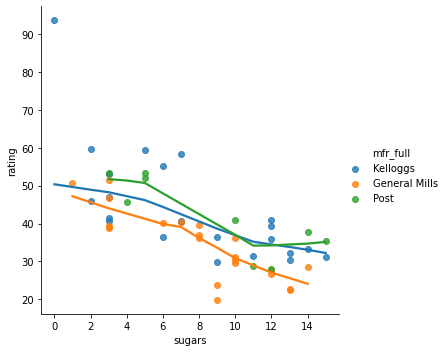

In [23]:
#generate the new dataframe
cereal_merge5 = cereal_merge.loc[:,["mfr_full","sugars","rating"]][(cereal_merge.mfr_full=="General Mills")|(cereal_merge.mfr_full=="Post")|(cereal_merge.mfr_full=="Kelloggs")]  
cereal_merge5

#plots
plots1=sns.lmplot (x= "sugars", y = "rating", hue = 'mfr_full', lowess=True, data = cereal_merge5)
plots1

# comments: The level of sugars in the cereals was negatively correlated with the rating from all these manufactures. 

(f) (10 points) Find the correlation between protein and potassium for
each of the shelves (the correlation function in R is "cor").


In [24]:
correlation = cereal_merge.loc[:,["shelf","protein","potass"]].groupby("shelf").corr()
correlation

protein    potass
shelf                            
1     protein  1.000000  0.442439
      potass   0.442439  1.000000
2     protein  1.000000  0.479806
      potass   0.479806  1.000000
3     protein  1.000000  0.711762
      potass   0.711762  1.000000

(g) (10 points) Recreate the table presented below. The rows are the
shelf 1, 2, and 3 and each column is a quantile of the distribution of
calories for each shelf. So for example, the 80-th percentile of calories
for cereal found on shelf 3 is 130.

In [25]:
#generate narrow data
g_narrow = cereal_merge[['shelf','calories']].groupby("shelf",as_index=False).quantile(np.arange(0, 1.1, 0.1))
g_narrow.head

<bound method NDFrame.head of        shelf  calories
0 0.0      1      80.0
  0.1      1      90.0
  0.2      1      98.0
  0.3      1     100.0
  0.4      1     100.0
  0.5      1     105.0
  0.6      1     110.0
  0.7      1     110.0
  0.8      1     110.0
  0.9      1     110.0
  1.0      1     110.0
1 0.0      2      90.0
  0.1      2     100.0
  0.2      2     100.0
  0.3      2     110.0
  0.4      2     110.0
  0.5      2     110.0
  0.6      2     110.0
  0.7      2     110.0
  0.8      2     120.0
  0.9      2     120.0
  1.0      2     120.0
2 0.0      3      50.0
  0.1      3      70.0
  0.2      3      90.0
  0.3      3     100.0
  0.4      3     100.0
  0.5      3     110.0
  0.6      3     110.0
  0.7      3     120.0
  0.8      3     130.0
  0.9      3     140.0
  1.0      3     160.0>

In [26]:
percentile=[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
g2=g_narrow.assign (percentile_g=percentile)
g2

shelf  calories  percentile_g
0 0.0      1      80.0           0.0
  0.1      1      90.0           0.1
  0.2      1      98.0           0.2
  0.3      1     100.0           0.3
  0.4      1     100.0           0.4
  0.5      1     105.0           0.5
  0.6      1     110.0           0.6
  0.7      1     110.0           0.7
  0.8      1     110.0           0.8
  0.9      1     110.0           0.9
  1.0      1     110.0           1.0
1 0.0      2      90.0           0.0
  0.1      2     100.0           0.1
  0.2      2     100.0           0.2
  0.3      2     110.0           0.3
  0.4      2     110.0           0.4
  0.5      2     110.0           0.5
  0.6      2     110.0           0.6
  0.7      2     110.0           0.7
  0.8      2     120.0           0.8
  0.9      2     120.0           0.9
  1.0      2     120.0           1.0
2 0.0      3      50.0           0.0
  0.1      3      70.0           0.1
  0.2      3      90.0           0.2
  0.3      3     100.0           0.3
  0.4      3     100.0           0.4
  0.5      3     110.0           0.5
  0.6      3     110.0           0.6
  0.7      3     120.0           0.7
  0.8      3     130.0           0.8
  0.9      3     140.0           0.9
  1.0      3     160.0           1.0

In [27]:
g_wider=pd.pivot(g2,index="shelf",columns="percentile_g",values="calories")
g_wider

percentile_g,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
shelf,,,,,,,,,,,
1,80.0,90.0,98.0,100.0,100.0,105.0,110.0,110.0,110.0,110.0,110.0
2,90.0,100.0,100.0,110.0,110.0,110.0,110.0,110.0,120.0,120.0,120.0
3,50.0,70.0,90.0,100.0,100.0,110.0,110.0,120.0,130.0,140.0,160.0


2. Use the data found here about food inspection found here to answer the following questions. (Note: Remove observations with license number 0 be-
fore beginning!) https://www.dropbox.com/s/ra8s2tonbl037m2/inspections clean.csv?dl=0

In [36]:
from google.colab import files
uploaded = files.upload()
#then download from google colab

#another way to upload csv
#inspection = pd.read_csv(io.BytesIO(uploaded['inspections_clean.csv']))
#print(inspection.head(5))

Saving inspections_clean.csv to inspections_clean.csv


In [37]:
inspection=pd.read_csv("inspections_clean.csv")
inspection.head(5)

,inspection_id,dba_name,license_number,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations
0,1946279,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,7/8/2016,canvass,Pass,NaN
1,2531309,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,9/14/2021,canvass,Pass w/ Conditions,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...
2,2282674,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,4/5/2019,canvass,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...
3,2082143,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,9/14/2017,canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...
4,1938102,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,7/6/2016,canvass,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P..."


(a) (10 points) What is the pass rate by inspection type?


In [38]:
from pandas.core.indexers import length_of_indexer
inspection_test = inspection
# I did not include Pass W/condition as suggested in 2c
inspection_test["pass"]=np.where((inspection_test.results=="Pass"),1,0)
inspection_test.head(5)
t2a=inspection_test[['inspection_type','pass']].groupby('inspection_type').sum()
t2a ["pass_rate"]=t2a["pass"]/inspection_test.shape[0]
t2a

,pass,pass_rate
inspection_type,,
canvass,52097,0.407316
complaint,11369,0.088888
license,12572,0.098293


(b) (10 points) Find all the businesses that have ever had a failed inspection. Using only these businesses, create a contingency table of all the inspections for these businesses of risk type by inspection type.
It should look like the table below:
## # A tibble: 4 x 4
## # Groups: risk [4]
## risk canvass complaint license
## <chr> <int> <int> <int>
## 1 Risk 1 (High) 60151 14355 10646
## 2 Risk 2 (Medium) 10101 4556 2942
## 3 Risk 3 (Low) 1901 875 1854
## 4 <NA> NA NA 1

In [39]:
#Find all the businesses that have ever had a failed inspection
#If I want to find the businesses names that had a failed inspection (keep here for record)
#inspection_test4 = inspection[inspection['results']=="Fail"].loc[:,["dba_name"]]
#inspection_test4.drop_duplicates()
inspection_fail = inspection[inspection['results']=="Fail"]
inspection_fail.shape

(28854, 12)

In [42]:
inspection_test5  = inspection[(inspection.dba_name.isin(inspection_fail.dba_name))]
inspection_test5.head(5) 

,inspection_id,dba_name,license_number,facility_type,risk,address,zip,inspection_date,inspection_type,results,violations,pass
0,1946279,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,7/8/2016,canvass,Pass,NaN,1
1,2531309,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,9/14/2021,canvass,Pass w/ Conditions,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...,0
2,2282674,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,4/5/2019,canvass,Pass,51. PLUMBING INSTALLED; PROPER BACKFLOW DEVICE...,1
3,2082143,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,9/14/2017,canvass,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,1
4,1938102,'C' A CATERING AND EVENT COMPANY,1894079,restaurant,Risk 1 (High),4300-4304 N CENTRAL AVE,60634.0,7/6/2016,canvass,Fail,"9. WATER SOURCE: SAFE, HOT & COLD UNDER CITY P...",0


In [43]:
#narrow form
inspection_test6 = inspection_test5.groupby(["risk","inspection_type"],as_index=False,dropna=False).agg(count = pd.NamedAgg(column ='dba_name', aggfunc='count'))
inspection_test6

,risk,inspection_type,count
0,Risk 1 (High),canvass,62978
1,Risk 1 (High),complaint,14741
2,Risk 1 (High),license,12562
3,Risk 2 (Medium),canvass,11120
4,Risk 2 (Medium),complaint,4838
5,Risk 2 (Medium),license,3395
6,Risk 3 (Low),canvass,2065
7,Risk 3 (Low),complaint,907
8,Risk 3 (Low),license,2383
9,NaN,license,1


In [44]:
#pivot wider
test_2b=pd.pivot(inspection_test6,index="risk",columns="inspection_type",values="count")
test_2b

inspection_type,canvass,complaint,license
risk,,,
NaN,NaN,NaN,1.0
Risk 1 (High),62978.0,14741.0,12562.0
Risk 2 (Medium),11120.0,4838.0,3395.0
Risk 3 (Low),2065.0,907.0,2383.0


(c) (10 points) What is the restaurant with the largest number of inspections that has passed (do NOT include \passed with conditions")
ALL of their inspections and how many inspections did they have?
That is which restaurant had the most inspections without any failure?

In [45]:
#restarants ever failed
fail_restarant = inspection[inspection.results!="Pass"][inspection.facility_type=="restaurant"]
fail_restarant.head(5) 
#first find out all the restarants
all_restarant = inspection[inspection.facility_type=="restaurant"]
all_restarant.head(5)
# and then filter the restarants that don't included the failed ones
restarant_never_fail = all_restarant[~(all_restarant.dba_name.isin(fail_restarant.dba_name))]
restarant_never_fail.shape
#inspections of these restarants
most_inspections = restarant_never_fail.groupby("dba_name").agg(inspection_number=pd.NamedAgg(column ='results', aggfunc='count')).sort_values(by="inspection_number",ascending=False)
most_inspections.head(5)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,inspection_number
dba_name,
MANNY'S CAFE MIDWAY,16
TUSCANY CAFE,15
MILLERS PUB,15
HARRY CARAY'S SEVENTH INNING STRETCH,15
TAYLOR STREET MARKET,15


**#MANNY'S CAFE MIDWAY had the most inspections without any failure.**

2(d) (10 points) Make a stacked bar chart showing the number of tests for
grocery stores, restaurants, and schools with each bar stratified by
results (target plot is displayed below).


In [46]:
#filter 
bar_chart = inspection[(inspection.facility_type == 'restaurant')|(inspection.facility_type =='school')|(inspection.facility_type =='grocery store')]
bar_chart
#groupby
data_plots=bar_chart.groupby(["results","facility_type"],as_index=False).agg(inspection_number=pd.NamedAgg(column ='inspection_id', aggfunc='count'))
data_plots

,results,facility_type,inspection_number
0,Fail,grocery store,4077
1,Fail,restaurant,19608
2,Fail,school,3595
3,Pass,grocery store,8117
4,Pass,restaurant,52006
5,Pass,school,12382
6,Pass w/ Conditions,grocery store,2537
7,Pass w/ Conditions,restaurant,17766
8,Pass w/ Conditions,school,1831


In [47]:
#pivot wider
test_2d=pd.pivot(data_plots,index="facility_type",columns="results",values="inspection_number")
test_2d

results,Fail,Pass,Pass w/ Conditions
facility_type,,,
grocery store,4077,8117,2537
restaurant,19608,52006,17766
school,3595,12382,1831


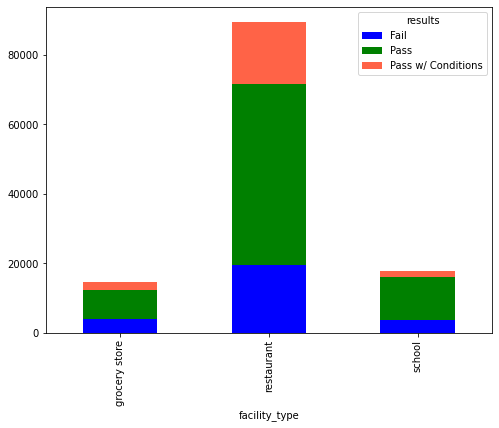

In [48]:
#plots
test_2d.plot.bar(stacked=True,color =['blue','green', 'tomato'],figsize=(8,6))

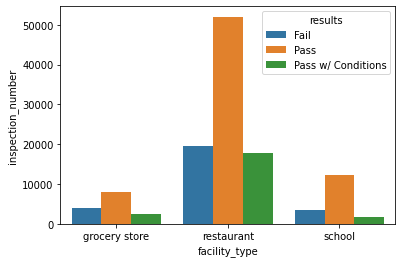

In [49]:
#plots with sns, not what I wanted. Just for a record
plots=sns.barplot(x= "facility_type", y = "inspection_number", hue = 'results',data=data_plots)
plots

(e) (10 points) Make side by side boxplots of the distribution of the
number of tests establishments have performed on them stratified by
whether or not an establishment has ever failed a failed test (target
plot is displayed below).

In [59]:
#find the inspection number from the establishment that ever failed or not
test_2e = inspection
test_2e["fail"]=np.where((test_2e.results=="Fail"),1,0)
test_2e.head(5)
test_2e1=test_2e.groupby("dba_name",as_index=False).agg(sum_fail = pd.NamedAgg(column ='fail', aggfunc='sum'),inspection_number=pd.NamedAgg(column ='inspection_id', aggfunc='count'))
test_2e1["any_fail"]=np.where((test_2e1.sum_fail>0),True,False)
test_2e1.sort_values(by="inspection_number",ascending=False).head(5)

,dba_name,sum_fail,inspection_number,any_fail
10169,SUBWAY,389,2802,True
3113,DUNKIN DONUTS,189,1242,True
120,7-ELEVEN,67,403,True
7064,MCDONALD'S,78,376,True
2242,CHIPOTLE MEXICAN GRILL,45,322,True


In [67]:
# calculate the percentage of inspections among all
test_2e1['n']=test_2e1.inspection_number/sum(test_2e1.inspection_number)*100
test_2e1.head(5)

,dba_name,sum_fail,inspection_number,any_fail,n
0,#1 CHOP SUEY,8,33,True,0.025801
1,"#1 DELI, INC",0,3,False,0.002346
2,#1 WOK N ROLL,5,17,True,0.013291
3,'C' A CATERING AND EVENT COMPANY,1,11,True,0.008600
4,'LAINE'S BAKE SHOP,1,3,True,0.002346


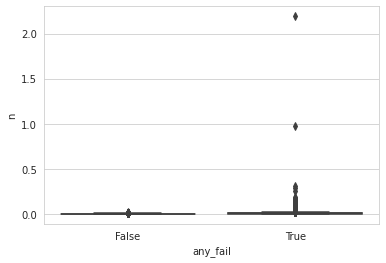

In [74]:
#plots
sns.boxplot(x = 'any_fail', y = 'n', data = test_2e1)